In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
#Reading the graphml files
G = nx.read_graphml(r"C:\Users\Ritish Khetarpal\MS_THESIS\OSMnx Indian Streets\Graphml files networkx\Jaipur_street_network.graphml")

In [3]:
#Checking the number of nodes and edges
print("num of nodes = ", G.number_of_nodes())
print("num of edges = ", G.number_of_edges())

num of nodes =  144242
num of edges =  194446


In [ ]:
#Creating adjacency matrix
adj_matrix_G = nx.to_numpy_array(G)

In [6]:
max_value = max(max(row) for row in adj_matrix_G)
print("Maximum value in the adjacency matrix:", max_value)

Maximum value in the adjacency matrix: 10.968896919809724


In [7]:
#norm_adj_mat_G = (np.array(adj_matrix_G))/max_value

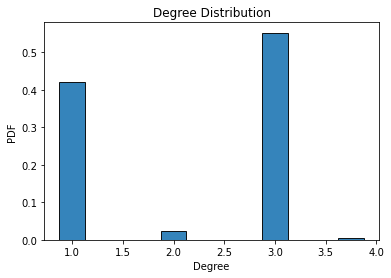

In [8]:
#Degree distribution
degree = dict(G.degree())

#Creating a list for the degree of nodes
degree_list = list(degree.values())

# Create a histogram
hist, bins = np.histogram(degree_list,bins=12)

# Normalize the histogram
hist_normalized = hist / hist.sum()

# Plot the normalized histogram
plt.bar(bins[:-1], hist_normalized, width=bins[1] - bins[0],  edgecolor='black', alpha=0.9)

# Add labels and title
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.title('Degree Distribution')


#Saving the plot
plt.savefig("Degree_Distribution_Jaipur")
plt.show()

In [9]:
#Calculating the betweenness centrality
betw_cent = nx.betweenness_centrality(G, weight='weight')

#Converting the betweenness centrality dict into the list
bc_list = list(betw_cent.values())

In [10]:
#Calculating the average of the betweenness centrality
av_betw_cent = sum(bc_list)/len(bc_list)

#Printing the average of betweenness centrality
print("Average Betweenness Centrality is = ",av_betw_cent)

Average Betweenness Centrality is =  0.0110815418493611


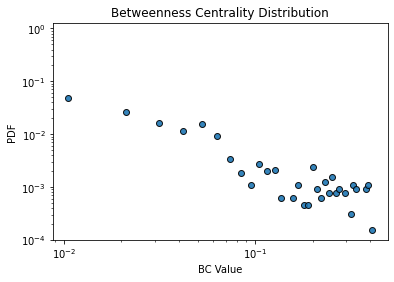

In [11]:
# Create a histogram
hist, bins = np.histogram(bc_list, bins=40)

# Normalize the histogram
hist_normalized = hist / hist.sum()

# Plot the normalized histogram
scatter_plot_BC =plt.scatter(bins[:-1], hist_normalized, edgecolor='black', alpha=0.9)

# Add labels,scale and title
plt.xscale('log')
plt.yscale('log')

plt.xlabel('BC Value')
plt.ylabel('PDF')
plt.title('Betweenness Centrality Distribution')


#Saving the plot
plt.savefig("BC_Distribution_Jaipur")
plt.show()

In [12]:
# Assuming you have a scatter plot called scatter_plot
scatter_data = scatter_plot_BC.get_offsets()

# Extract x and y values into separate lists(Even if I set above scatter plot to log scale values wont change)
x_values = scatter_data[:, 0]
y_values = scatter_data[:, 1]

#Choose only non-zero values 
mask = (x_values != 0) & (y_values != 0)
nonzero_x_values = x_values[mask]
nonzero_y_values = y_values[mask]

#Printing the length of non-zero values
print("Number of non zero x values in scatter plot = ",len(nonzero_x_values))
print("Number of non zero y values in scatter plot = ",len(nonzero_y_values))

#log of the x and y values
logx_values = np.log(nonzero_x_values)
logy_values = np.log(nonzero_y_values)


Number of non zero x values in scatter plot =  32
Number of non zero y values in scatter plot =  32


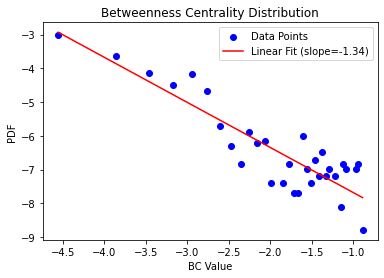

In [14]:
# Perform linear fitting using NumPy's polyfit function
coefficients = np.polyfit(logx_values, logy_values, 1)  # Fit a first-degree (linear) polynomial

# Extract the slope and intercept from the coefficients
slope, intercept = coefficients

# Create a linear regression model function
def linear_regression(x):
    return slope * x + intercept

# Generate predicted values using the linear regression model
predicted_y = linear_regression(logx_values)

# Plot the scatter plot and linear fitting curve
plt.scatter(logx_values, logy_values, label='Data Points', color='blue')
plt.plot(logx_values, predicted_y, label=f'Linear Fit (slope={slope:.2f})', color='red')

plt.xlabel('BC Value')
plt.ylabel('PDF')
plt.legend()
plt.title('Betweenness Centrality Distribution')

#Saving the plot
plt.savefig("fitted_distribution_BC_Jaipur ")
plt.show()

In [15]:
#Calculating the pairs of all shortest path length from dijkstra algorithm 
shortest_path_lengths_dict = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

In [16]:
#Calculating the sum of inverse for all values in all nested dict
inner_inverse_sum = 0
for outer_key, inner_dict in shortest_path_lengths_dict.items():
    for inner_values in inner_dict.values():
        if inner_values != 0:
            values = 1/inner_values
            inner_inverse_sum += values

In [17]:
#calculating the value of n which should be equal to number of nodes here. 
n= len(shortest_path_lengths_dict)
print("Number of nodes: ", n)
# Calculating Number of pairs = n(n-1) not n(n-1)/2 because in dict we are considering twice
num_pairs = n*(n-1)
print("Number of pairs: ",num_pairs)

Number of nodes:  6556
Number of pairs:  42974580


In [18]:
#Calculating the efficiency of the network
Efficiency = (1/num_pairs)*inner_inverse_sum
print("Efficiency of the network is:", Efficiency)

Efficiency of the network is: 0.04490960741554864


In [20]:
# Calculate the average weighted global clustering coefficient
wg_clustering_coefficient = nx.average_clustering(G, weight="weight")
print("The average clustering coefficient of the network is: ", wg_clustering_coefficient)

The average clustering coefficient of the network is:  0.00020572888914777016


In [22]:
#Average Degree
total_degree = sum(dict(G.degree()).values())
av_degree = total_degree / len(G.nodes())
print("The average degree of the network is: ", av_degree)

#probability of connection
p = av_degree / (len(G.nodes()) - 1)
print("The Probability of the connection in the network is: ", p)

The average degree of the network is:  2.1403294691885297
The Probability of the connection in the network is:  0.0003265186070463051


In [23]:
#Parameters
n = 144242  
num_ensembles = 20  
seed_values = range(10, num_ensembles + 1) 

# Calculate average clustering coefficients for each graph
clustering_coefficient_r = []
global_efficiency_r = []

for seed in seed_values:
    er_random_graph = nx.erdos_renyi_graph(n, p, seed=seed)
    #Calculate the clustering coefficient  and efficiency
    clustering_coefficient_r.append(nx.average_clustering(er_random_graph))
    global_efficiency_r.append(nx.global_efficiency(er_random_graph))

# Calculate the average clustering coefficient
av_clustering_r = np.mean(clustering_coefficient_r)
print("Average Clustering Coefficient for random network is:", av_clustering_r)

av_global_efficiency_r = np.mean(global_efficiency_r)
print("Average Global Efficieny for random network is:", av_global_efficiency_r)


Average Clustering Coefficient for random network is: 0.00021455732255000104
Average Global Efficieny for random network is: 0.06770853932018785


In [24]:
#Ratio of Ce and Cr
CeCr = wg_clustering_coefficient/av_clustering_r
print('Ratio of C_e and C_r:',CeCr)

#Ratio of Ee and Er
EeEr = efficiency_e/av_global_efficiency_r
print('Ratio of E_e and E_r:',EeEr)

Ratio of C_e and C_r: 0.9588527984162671
Ratio of E_e and E_r: 0.3474001485440418


In [25]:
#Ratio of Ce and Cr
CeCr = wg_clustering_coefficient/av_clustering_r
print('Ratio of C_e and C_r:',CeCr)

#Ratio of Ee and Er
EeE = Efficiency/av_global_efficiency_r
print('Ratio of E_e and E_r:',EeE)

Ratio of C_e and C_r: 0.9588527984162671
Ratio of E_e and E_r: 0.6632783378057379


In [26]:
#Calculating Meshedness coefficient(alpha)
n = 144242   #nodes
k = 194446   #links
alpha = (k - n + 1)/(2*n - 5)
print("The value of messhedness coefficient(alpha) is : ", alpha)

The value of messhedness coefficient(alpha) is :  0.03517204547188525


In [27]:
# Calculate eigenvalues of adjacency matrix
eigenvalues = np.linalg.eigvals(adj_matrix_G)

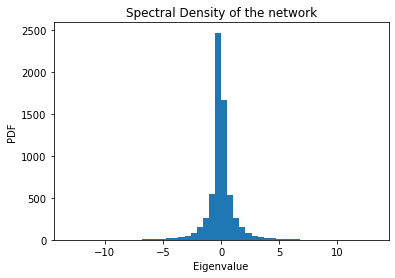

In [28]:
#Plotting the histogram of the eigenvalues 
plt.hist(np.real(eigenvalues),bins=50)

#Labels
plt.xlabel('Eigenvalue')
plt.ylabel('PDF')
plt.title('Spectral Density of the network')

#Saving the plot
plt.savefig("Hist_Spectra_Jaipur")
plt.show()


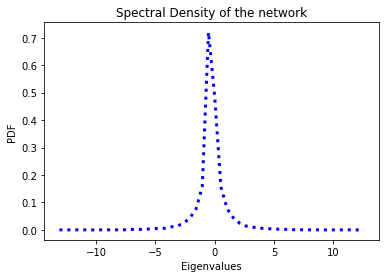

In [29]:
# Calculate spectral density
hist, bins = np.histogram(np.real(eigenvalues), bins=50, density=True)

# Plot eigenvalue vs Probability density function
plt.plot(bins[:-1], hist, color="blue", linestyle='dotted',linewidth=3, markersize=4)

# Normalize the histogram
#hist_normalized = hist / hist.sum()
# Plot eigenvalue vs density 
#plt.plot(bins[:-1], hist_normalized, color="blue", linestyle='dotted',linewidth=3, markersize=4)

#Labels
plt.xlabel('Eigenvalues')
plt.ylabel('PDF')
plt.title('Spectral Density of the network')

#Saving the plots
plt.savefig("Spectra_Jaipur")
plt.show()

In [32]:
#Calculating max and min eigenvalues
max_eigenvalue = max(eigenvalues)
min_eigenvalue = min(eigenvalues)

#Printing highest and smallest eigenvalues
highest_eigenvalue = print("Highest Eigenvalues is:", max_eigenvalue)
smallest_eigenvalue = print("Smallest Eigenvalues is:",min_eigenvalue)

Highest Eigenvalues is: (13.083508007282683+0j)
Smallest Eigenvalues is: (-13.08350800361204+0j)


In [33]:
#Sort the list in descending order
sorted_numbers = sorted(eigenvalues, reverse=True)

#The second highest value is at index 1 in the sorted list
second_highest_eigenvalue = sorted_numbers[1]
print("Second highest eigenvalue is:",second_highest_eigenvalue)

Second highest eigenvalue is: (11.859711866152907+0j)


In [34]:
#Calculating R for the spectra 
R = (max_eigenvalue - second_highest_eigenvalue)/(second_highest_eigenvalue - min_eigenvalue)
print("R-value for the Spectra is:",R)

R-value for the Spectra is: (0.049063278418726014+0j)


In [ ]:
#Calculating the assortativity of the network
assortativity = nx.degree_assortativity_coefficient(G,weight='weight')
print("The Assortativity of the network is: ", assortativity)